<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


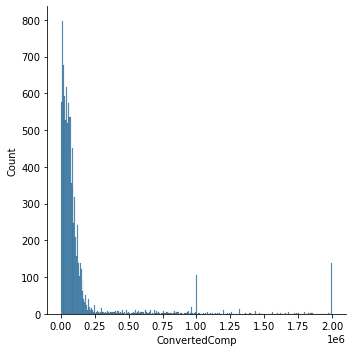

In [7]:
# Plot the distribution curve for the column `ConvertedComp`.

import seaborn as sns
sns.displot(df, x="ConvertedComp")

In [ ]:
# your code goes here


Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

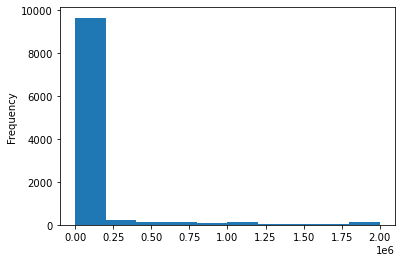

In [9]:
# your code goes here
import pandas as pd
df["ConvertedComp"].plot(kind="hist")

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?



In [11]:
# your code goes here

df['Gender'].value_counts()


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
df["Age"].describe().loc[["min", "25%", "50%", "75%", "max"]]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

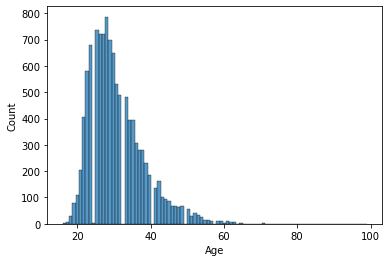

In [14]:
sns.histplot(df, x="Age")


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

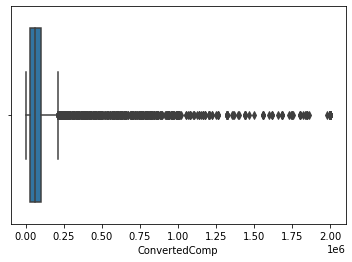

In [15]:
# your code goes here
sns.boxplot(data=df, x="ConvertedComp")

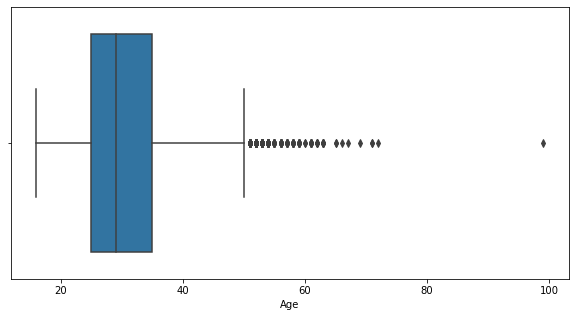

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Age, data=df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
# Calculate the percentiles for the 75th and 25th percentiles
quartiles = df["ConvertedComp"].quantile([0.25, 0.75])
# Subtract them to get the IQR
iqr = quartiles[0.75] - quartiles[0.25]
# Display the IQR
print(iqr)


73132.0


Find out the upper and lower bounds.


In [20]:
# your code goes here
# Calculate the quartiles for the column ConvertedComp
quartiles = df["ConvertedComp"].quantile([0.25, 0.75])
# Calculate the IQR for the column ConvertedComp
iqr = quartiles[0.75] - quartiles[0.25]
# Calculate the upper and lower bounds for the column ConvertedComp
upper_bound = quartiles[0.75] + 1.5 * iqr
lower_bound = quartiles[0.25] - 1.5 * iqr
# Display the upper and lower bounds
print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)


Upper bound: 209698.0
Lower bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
# Calculate the quartiles for the column ConvertedComp
quartiles = df["ConvertedComp"].quantile([0.25, 0.75])
# Calculate the IQR for the column ConvertedComp
iqr = quartiles[0.75] - quartiles[0.25]
# Calculate the upper and lower bounds for the column ConvertedComp
upper_bound = quartiles[0.75] + 1.5 * iqr
lower_bound = quartiles[0.25] - 1.5 * iqr
# Count the number of outliers in the column ConvertedComp
outliers = df.loc[(df["ConvertedComp"] > upper_bound) | (df["ConvertedComp"] < lower_bound), "ConvertedComp"]
outliers_count = outliers.count()
# Display the number of outliers
print(outliers_count)



879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here

# Calculate the IQR for the column ConvertedComp
iqr = quartiles[0.75] - quartiles[0.25]
# Calculate the upper and lower bounds for the column ConvertedComp
upper_bound = quartiles[0.75] + 1.5 * iqr
lower_bound = quartiles[0.25] - 1.5 * iqr
# Create a new dataframe without the outliers in the column ConvertedComp
new_df = df.loc[(df["ConvertedComp"] <= upper_bound) & (df["ConvertedComp"] >= lower_bound)]
# Display the new dataframe
new_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
corr_matrix = df.corr()

In [25]:
print(corr_matrix["Age"])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [26]:
new_df["ConvertedComp"].median()

52704.0

In [27]:
new_df["ConvertedComp"].mean()

59883.20838915799

In [7]:
# Calculate the percentage of each category in a column
def percentage(col):
    return round(100 * col.value_counts() / len(col), 1)

# Print the percentage of Gender
print("Gender:")
print(percentage(df["Gender"]))

# Print the percentage of Age
print("Age:")
print(percentage(df["Age"]))

# Print the percentage of Country
print("Country:")
print(percentage(df["Country"]))

# Print the percentage of MainBranch
print("MainBranch:")
print(percentage(df["MainBranch"]))

# Print the percentage of LanguageWorkedWith
print("LanguageWorkedWith:")
languages = df["LanguageWorkedWith"].str.split(";").explode()
print(percentage(languages))

Gender:
Man                                                            91.9
Woman                                                           6.4
Non-binary, genderqueer, or gender non-conforming               0.6
Man;Non-binary, genderqueer, or gender non-conforming           0.2
Woman;Non-binary, genderqueer, or gender non-conforming         0.1
Woman;Man                                                       0.1
Woman;Man;Non-binary, genderqueer, or gender non-conforming     0.0
Name: Gender, dtype: float64
Age:
28.0    6.9
25.0    6.5
27.0    6.3
26.0    6.3
29.0    6.1
       ... 
29.5    0.0
22.5    0.0
67.0    0.0
69.0    0.0
99.0    0.0
Name: Age, Length: 63, dtype: float64
Country:
United States             27.4
India                      7.9
United Kingdom             7.2
Germany                    6.2
Canada                     3.8
                          ... 
Cambodia                   0.0
Monaco                     0.0
Qatar                      0.0
Togo                    

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
